## Turtytsia Oleksandr
### xturyt00

### Project set up

In [52]:
import numpy as np
import soundfile as sf
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Constants
MIDI_FROM = 24
MIDI_TO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2

sound, Fs = sf.read("klavir.wav")
WHOLETONE_SAMPLES = Fs * WHOLETONE_SEC


class Tone:
    def __init__(self, **kwargs):
        self.tone = kwargs.get("tone")
        self.freq = kwargs.get("freq")
        self.path = kwargs.get("path")

    def calc(self): #4.1
        """
        Let's say I need tone 37. I need to skip 37 - 24 tones. 
        
        First I need to convert 1 tone to samples,
        where 1 second has 48000 samples, 1 tone lasts 2 seconds, which is 96000 samples.

        (37 - 24) * 96000 - number of samples that I need to skip (exactly where tone 37 starts)

        Then I have to skip 0.25 sec. In 1s 48000 samples, in 0.25s 12000 samples
        
        (37 - 24) * 96000 + 12000

        """
        skipped_tones = self.tone - MIDI_FROM 
        samples_from = int(skipped_tones * WHOLETONE_SAMPLES + 
                           SKIP_SEC * Fs)
        samples_to = int(samples_from + Fs/self.freq*3)
        origin_from = samples_from
        origin_to = int(origin_from + Fs / 2)
        return sound[samples_from:samples_to], sound[origin_from:origin_to]
    def dft(self): #4.2
        samples, origin = self.calc()
        N = int(Fs*HOWMUCH_SEC)
        tone_dft = np.fft.fft(origin)  # find dft of origin signal
        # cut it in half (because for dft it's flipped horizontally). Calculates absolute value to remove complex numbers
        tone_dft = np.log(np.abs(tone_dft[:N//2])**2 + 1e-5)
        freq = np.arange(Fs * SKIP_SEC) * Fs // 24000  # save frequency
        return tone_dft, freq


tones = [
    Tone(tone=38, freq=73.42, path = "./audio/a_origin.wav"),
    Tone(tone=46, freq=116.54, path = "./audio/b_origin.wav"),
    Tone(tone=87, freq=1244.51, path = "./audio/c_origin.wav")]


## 4.1

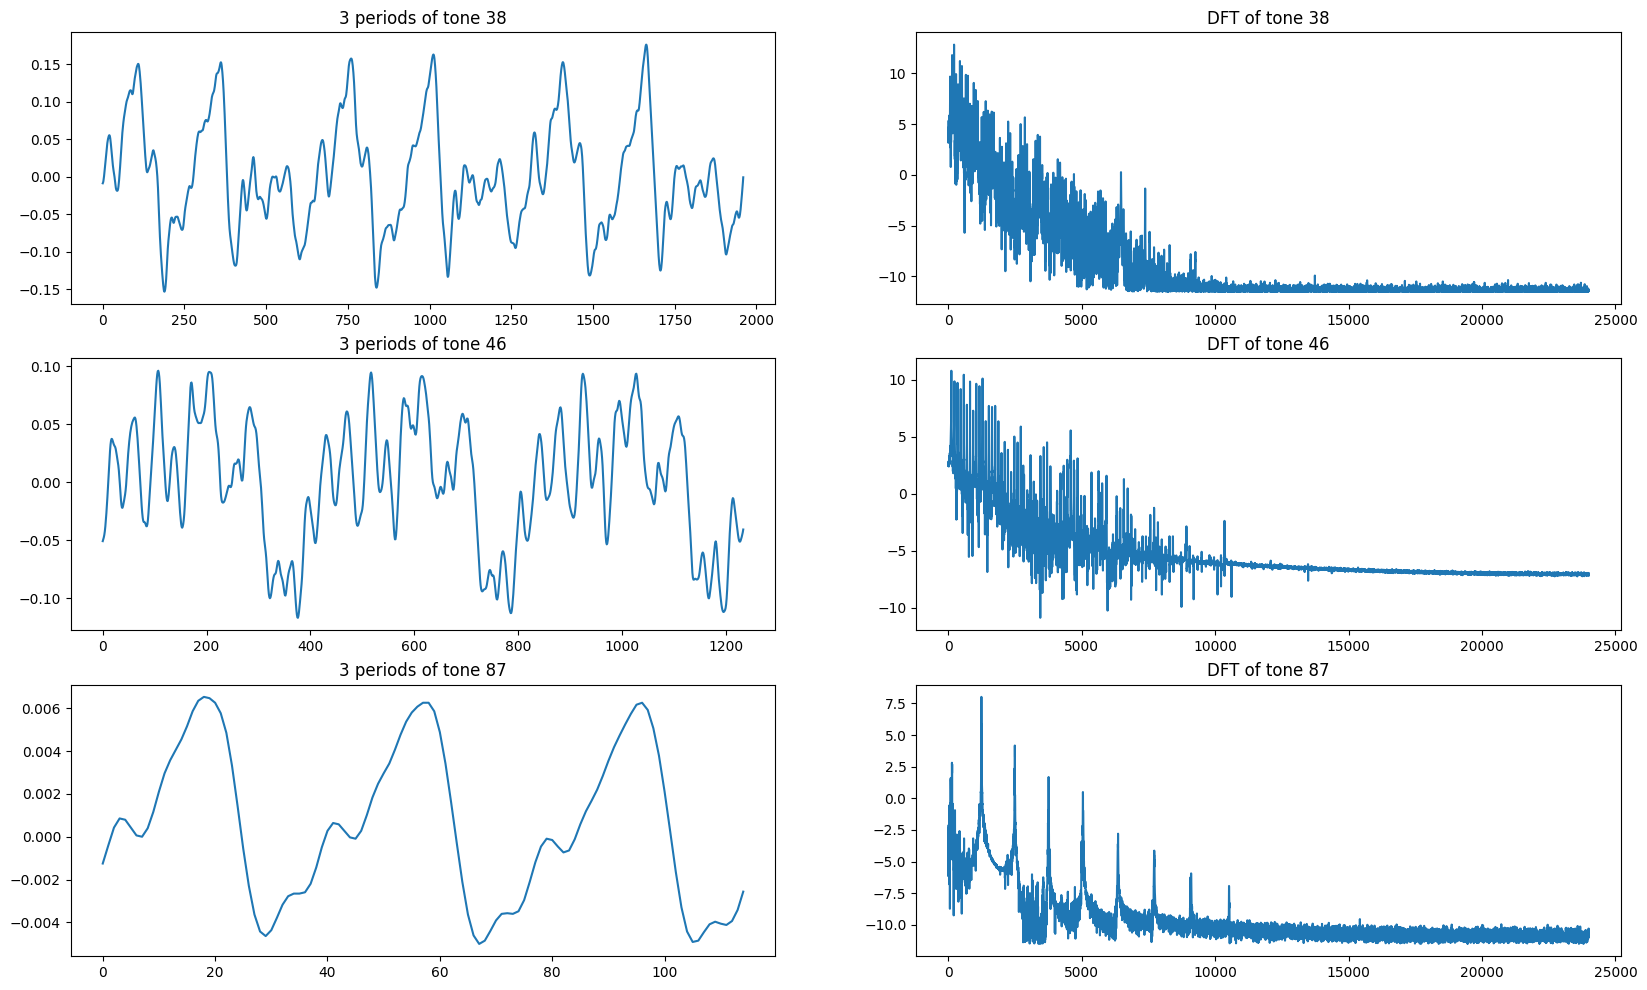

In [54]:
fig, ax = plt.subplots(3,2, figsize=(20, 12))

for i in range(0, 3):
    samples, origin = tones[i].calc()
    tone_dft, freq = tones[i].dft()

    ax[i, 0].set_title(f"3 periods of tone {tones[i].tone}")
    ax[i,0].plot(samples)
    ax[i, 1].set_title(f"DFT of tone {tones[i].tone}")
    ax[i, 1].plot(freq, tone_dft)

    wavfile.write(tones[i].path, Fs, origin)


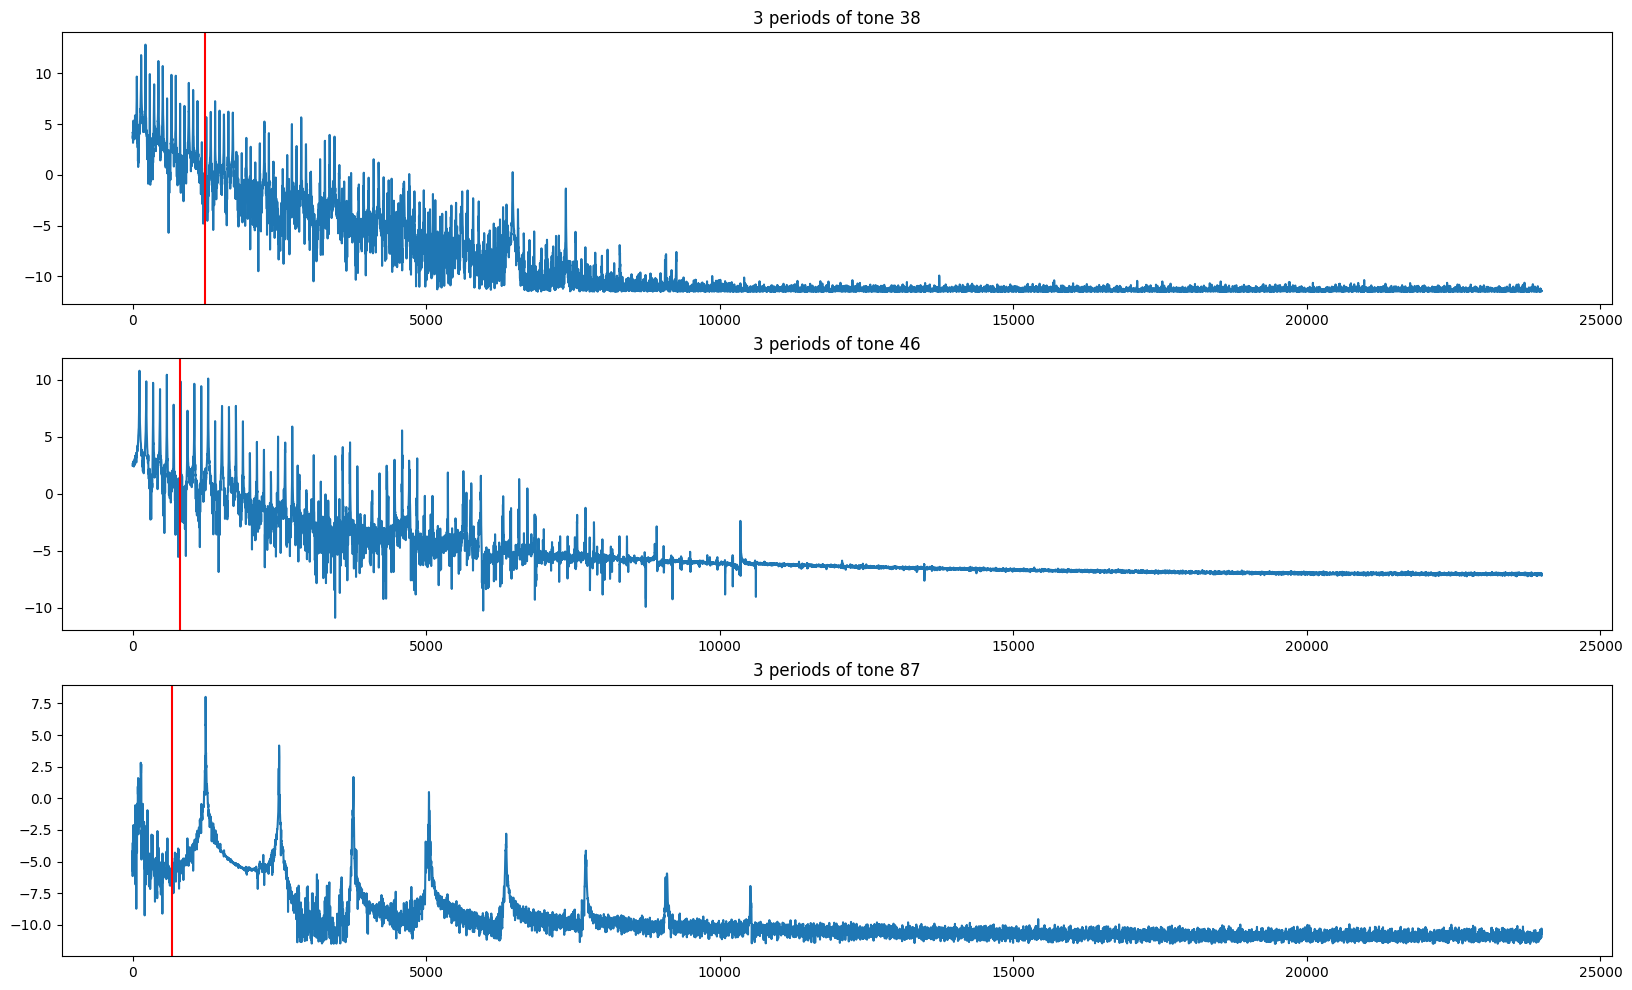

In [120]:
from scipy.signal import find_peaks

fig, ax = plt.subplots(3, figsize=(20, 12))

for i in range(0, 3):
    samples, origin = tones[i].calc()
    tone_dft, freq = tones[i].dft()

    corr = np.correlate(tone_dft, tone_dft, mode='full')
    corr = corr[len(corr)//2:]

    peaks = find_peaks(corr)[0]
    tone_max = corr.max()
    tone_max_index = list(corr).index(tone_max)
    tone_max_2 = 0
    for peak in peaks:
        if tone_max_2 < corr[peak]:
            if tone_max_2 != tone_max:
                tone_max_2 = corr[peak]
                tone_max_index_2 = peak
    zak_frek_28 = 1/(tone_max_index_2-tone_max_index)*Fs


    ax[i].set_title(f"3 periods of tone {tones[i].tone}")
    ax[i].plot(freq, tone_dft)
    ax[i].axvline(zak_frek_28, -10, 10, color='r')
